### Topic: Challenge Set 6
### Subject: Linear Learning
### Date: 10/15/2018
### Name: Maddy O'Brien Jones
### Worked: alone

## Challenge 1
Generate (fake) data that is linearly related to log(x).  

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)  

Simulate some data from this model.  

Then fit two models to it:  

* quadratic (second degree polynomial)  
* logarithmic (log(x))    

(The second one should fit really well, since it has the same form as the underlying model!)  

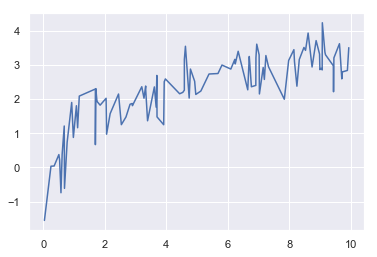

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf 

sns.set()

x = np.random.uniform(0, 10, 100)
noise = np.random.normal(1, 0.5, 100) 
y = np.log(x) + noise

df = pd.DataFrame({'x':x, 'noise': noise, 'y':y})
df.sort_values('x',inplace=True)
plt.plot(df['x'],df['y'])

In [2]:
x1 = pd.DataFrame(df['x'])
y1 = pd.DataFrame(df['y'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

p2 = PolynomialFeatures(2)
m = LinearRegression()
m.fit(p2.fit_transform(X_train),y_train)
m.score(p2.fit_transform(X_train),y_train)

0.7404753651501161

In [4]:
m.score(p2.fit_transform(X_test),y_test)

0.6917060245687245

In [5]:
logx = np.log(x1)
X_train, X_test, y_train, y_test = train_test_split(logx, y1, test_size=0.25, random_state=42)
m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)

0.7634599639890637

In [6]:
m.score(X_test,y_test)

0.7891806051597958

## Challenge 2 
Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)  

Split the data into a training and test set.  

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.  

(You could use sklearn.metrics.mean_squared_error.)  

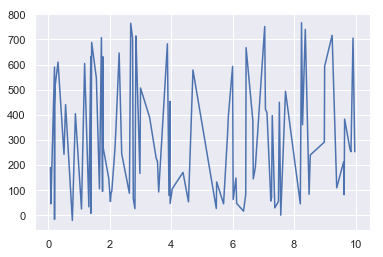

In [7]:
x2 = np.random.uniform(0, 10, 100)
noise = np.random.normal(20, 30, 100) 
y2 = 3 + 6*x + 7*x**2 + noise
df = pd.DataFrame({'x':x2, 'noise': noise, 'y':y2})

df.sort_values('x',inplace=True)
plt.plot(df['x'],df['y'])

In [8]:
x2 = pd.DataFrame(df['x'])
y2 = pd.DataFrame(df['y'])

X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.25, random_state=42)

In [9]:
p2 = PolynomialFeatures(2)
m = LinearRegression()
m.fit(p2.fit_transform(X_train),y_train)
m.score(p2.fit_transform(X_train),y_train)

0.006173931067050331

In [10]:
mean_squared_error(y_train, m.predict(p2.fit_transform(X_train)))

60042.83376878823

In [11]:
m.score(p2.fit_transform(X_test),y_test)

0.019095378102220284

In [12]:
mean_squared_error(y_test, m.predict(p2.fit_transform(X_test)))

56367.0953324861

## Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:  

* training error
* test error
* R squared
* AIC

In [13]:
def AIC(m,p,x,y):
    y_pred = m.predict(p.fit_transform(x))
    res = y - y_pred
    sse = (res**2).sum()
    return 2*(int(len(x.columns)))-2*np.log(sse)

def RMSE(actual, predicted):
    return np.sqrt(mean_squared_error(predicted,actual))

In [14]:
lod = []

for i in range(0,8):
    scores = dict()
    p = PolynomialFeatures(i)
    model = LinearRegression()
    model.fit(p.fit_transform(X_train),y_train)
    scores['degree'] = i
    scores['train_error'] = RMSE(model.predict(p.fit_transform(X_train)),y_train)
    scores['test_error'] = RMSE(model.predict(p.fit_transform(X_test)),y_test)
    scores['R2'] = model.score(p.transform(X_test),y_test)
    scores['AIC'] = AIC(model,p,X_test,y_test)[0]
    lod.append(scores)

sumstats = pd.DataFrame(lod)

In [15]:
sumstats

,AIC,R2,degree,test_error,train_error
0,-26.356866,-0.000636,0,239.793586,245.796332
1,-26.357825,-0.001117,1,239.851126,245.777246
2,-26.317033,0.019095,2,237.417555,245.036393
3,-26.308479,0.023282,3,236.910387,244.603987
4,-26.260161,0.046596,4,234.065791,243.371793
5,-26.227189,0.062184,5,232.144366,243.191601
6,-26.284115,0.035108,6,235.471745,242.421447
7,-26.279271,0.037442,7,235.186762,242.418325


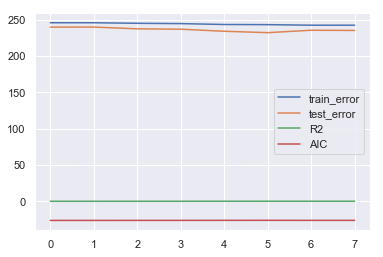

In [16]:
for each in ['train_error','test_error','R2','AIC']:
    plt.plot(sumstats['degree'],sumstats[each])
plt.legend(['train_error','test_error','R2','AIC'])

## Challenge 4
For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [17]:
p2 = PolynomialFeatures(2)
m = LinearRegression()
i=5

lod2 = []
while i<101:
    incdict = dict()
    incdict['m'] = str(i)
    m.fit(p2.fit_transform(x2[0:i]),y2[0:i])
    incdict['train'] = RMSE(m.predict(p2.transform(x2[0:i])),y2[0:i])
    
    if i<100:
        incdict['test'] = RMSE(m.predict(p2.transform(x2[i:])),y2[i:])
    else:
        incdict['test'] = RMSE(m.predict(p2.transform(x2[0:i])),y2[0:i])
        
    lod2.append(incdict)
    i+= 5
    
inc = pd.DataFrame(lod2)
inc

,m,test,train
0,5,3.686965e+06,199.562395
1,10,1.475673e+05,171.902455
2,15,2.077513e+03,245.396560
3,20,6.199459e+03,257.389986
4,25,4.223935e+03,253.549452
5,30,9.757634e+02,248.000221
6,35,8.970517e+02,256.702882
7,40,1.230921e+03,259.020367
8,45,3.990685e+02,254.635427
9,50,5.808752e+02,249.703067


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

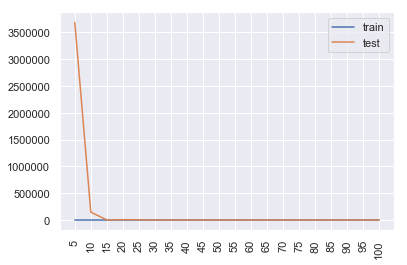

In [18]:
for each in ['train','test']:
    plt.plot(inc['m'],inc[each])
plt.legend(['train','test'])
plt.xticks(rotation='vertical')